# Illinois Death Demographics

In [17]:
import utils
import pandas as pd
from datetime import date

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### IDPH only publishes death demographics on and after 3/28, earlier entries (36 deaths) needs manual input

In [22]:
manual_entries = utils.IL_death_demographic_early()  # check manual entries
manual_entries.head()

,Date,County,Count,Sex,Age_bracket,Reference
0,2020-03-17,Cook,1,female,60.0,http://www.dph.illinois.gov/news/public-health...
1,2020-03-19,Will,1,male,40.0,http://www.dph.illinois.gov/news/public-health...
2,2020-03-19,Cook,1,female,80.0,http://www.dph.illinois.gov/news/public-health...
3,2020-03-19,Sangamon,1,female,70.0,http://www.dph.illinois.gov/news/public-health...
4,2020-03-20,Cook,1,female,70.0,http://www.dph.illinois.gov/news/public-health...


## parse_IL_death_demographic combines manual early entry and later automatic parser

In [3]:
%pdb on

Automatic pdb calling has been turned ON


In [120]:
to_date = date.today()
result = utils.parse_IL_death_demographic(pd.date_range('2020-02-01', to_date))

2020-04-16 00:00:00  Requesting Page: 0
2020-04-05 00:00:00  Requesting Page: 1
2020-03-31 00:00:00  Requesting Page: 0


In [121]:
result.tail()

,Date,County,Count,Sex,Age_bracket,Reference
22,2020-04-15,Macon,1,female,70,http://www.dph.illinois.gov/news/public-health...
21,2020-04-15,Lake,1,male,100,http://www.dph.illinois.gov/news/public-health...
20,2020-04-15,Lake,1,male,80,http://www.dph.illinois.gov/news/public-health...
18,2020-04-15,Lake,1,male,70,http://www.dph.illinois.gov/news/public-health...
0,2020-04-15,Cook,1,female,10,http://www.dph.illinois.gov/news/public-health...


In [123]:
result.to_csv('../outputs/death_demographic_' + str(to_date) + '.csv')

In [124]:
pivot = pd.pivot_table(result, index='Age_bracket', columns='Sex', values='Count', aggfunc='sum')
pivot

Sex,female,male,unknown
Age_bracket,,,
0,NaN,NaN,1.0
10,1.0,NaN,NaN
20,NaN,3.0,NaN
30,5.0,15.0,NaN
40,10.0,33.0,NaN
50,19.0,67.0,1.0
60,72.0,107.0,4.0
70,104.0,142.0,NaN
80,108.0,129.0,NaN


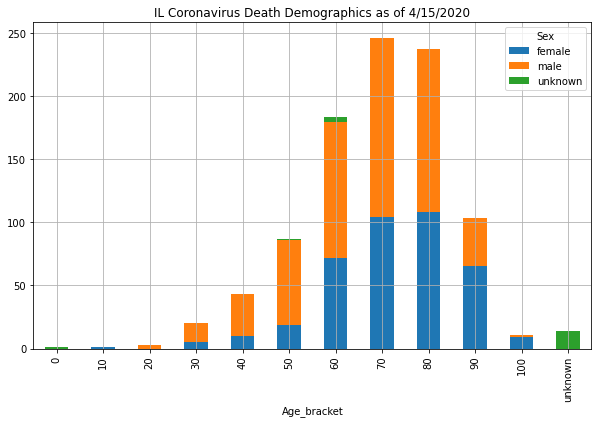

In [125]:
pivot.plot.bar(stacked=True, figsize=(10, 6), grid=True, title='IL Coronavirus Death Demographics as of 4/15/2020')

#### Prepare for Flourish.studio

In [109]:
total = result['Count'].sum()
pivot = pivot.rename(columns={'female': 'female count', 'male': 'male count', 'unknown': 'unknown count'})
pivot['female'] = pivot['female count'] / total * 100
pivot['male'] = pivot['male count'] / total * 100
pivot['unknown'] = pivot['unknown count'] / total * 100

In [110]:
pivot

Sex,female count,male count,unknown count,female,male,unknown
Age_bracket,,,,,,
0,NaN,NaN,1.0,NaN,NaN,0.105485
10,1.0,NaN,NaN,0.105485,NaN,NaN
20,NaN,3.0,NaN,NaN,0.316456,NaN
30,5.0,15.0,NaN,0.527426,1.582278,NaN
40,10.0,33.0,NaN,1.054852,3.481013,NaN
50,19.0,67.0,1.0,2.004219,7.067511,0.105485
60,72.0,107.0,4.0,7.594937,11.286920,0.421941
70,104.0,142.0,NaN,10.970464,14.978903,NaN
80,108.0,129.0,NaN,11.392405,13.607595,NaN


In [111]:
pivot.to_csv('../outputs/death_demographic_' + str(to_date) + '_flourish.csv')

In [51]:
import requests
from bs4 import BeautifulSoup

link = 'https://coronavirus.illinois.gov/s/county-map'
#headers = requests.utils.default_headers()
#headers.update({ 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})
req = requests.get(link)
soup = BeautifulSoup(req.content, 'html.parser')

In [65]:
soup.find_all('script')

[<script>
     document.write('<style>');
 	document.write('a.header {font-size: 20px; margin-right: 32px;}');
     document.write('</style>');
 
     document.write('<div class="header-email-line" align="right">');
 
     document.write('<a class=header href="mailto:DPH.SICK@ILLINOIS.GOV" target="_top">DPH.SICK@ILLINOIS.GOV</a>');
 	document.write('</div>');
 </script>,
 <script data-src="/jslibrary/1585773144000/canvas/CanvasRendering.js"></script>,
 <script data-src="/jslibrary/1585773144000/ui-analytics-reporting/EclairNG.js"></script>,
 <script src="/s/sfsites/l/%7B%22mode%22%3A%22PROD%22%2C%22app%22%3A%22siteforce%3AcommunityApp%22%2C%22fwuid%22%3A%22kHqYrsGCjDhXliyGcYtIfA%22%2C%22loaded%22%3A%7B%22APPLICATION%40markup%3A%2F%2Fsiteforce%3AcommunityApp%22%3A%22jezy9eMvUqztJqL1PQNDdA%22%7D%2C%22apce%22%3A1%2C%22apck%22%3A%22XqIkx4nyJvDxX87Zu6rF7g%22%2C%22mlr%22%3A1%2C%22pathPrefix%22%3A%22%22%2C%22dns%22%3A%22c%22%2C%22ls%22%3A1%2C%22ct%22%3A1%7D/inline.js?aura.attributes=%7B%22sch

In [60]:
soup.script

<script>
    document.write('<style>');
	document.write('a.header {font-size: 20px; margin-right: 32px;}');
    document.write('</style>');

    document.write('<div class="header-email-line" align="right">');

    document.write('<a class=header href="mailto:DPH.SICK@ILLINOIS.GOV" target="_top">DPH.SICK@ILLINOIS.GOV</a>');
	document.write('</div>');
</script>

In [19]:
[len(l.text) for l in soup.find_all('script')]

[345, 0, 0, 0, 0, 0, 0, 0]

In [34]:
for elm in soup.find_all('script'):
    print('Cook' in elm.text)

False
False
False
False
False
False
False
False


In [26]:
'Cook' in str(ll)

False

In [35]:
'ab' in 'abcd'

True